In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data=pd.read_csv("/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [ ]:
diabetes_data_balanced=pd.DataFrame(data)

In [ ]:
diabetes_data_balanced.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
diabetes_data_balanced.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
skewness = diabetes_data_balanced['BMI'].skew()
skewness_phy = diabetes_data_balanced['PhysHlth'].skew()
skewness_ment = diabetes_data_balanced['MentHlth'].skew()

print(f"Skewness of 'BMI': {skewness}")
print(f"Skewness of 'PhysHlth': {skewness_phy}")
print(f"Skewness of 'MentHlth': {skewness_ment}")

Skewness of 'BMI': 1.7191801918140364
Skewness of 'PhysHlth': 1.6573043998917887
Skewness of 'MentHlth': 2.388109639646643


In [ ]:
diabetes_data_balanced['log_' + "BMI"] = np.log(diabetes_data_balanced["BMI"])


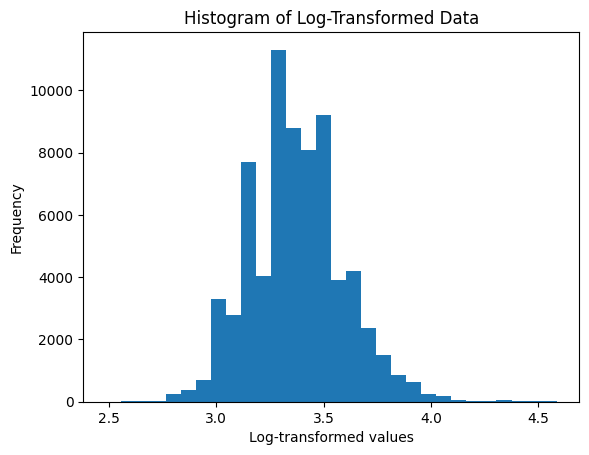

In [ ]:
plt.hist(diabetes_data_balanced['log_' + "BMI"], bins=30)
plt.title('Histogram of Log-Transformed Data')
plt.xlabel('Log-transformed values')
plt.ylabel('Frequency')
plt.show()


In [ ]:
skewness = diabetes_data_balanced['log_BMI'].skew()

In [ ]:
print(f"Skewness of 'BMI': {skewness}")

Skewness of 'BMI': 0.5366242135855774


In [ ]:
diabetes_data_balanced.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,log_BMI
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311,3.371445
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196,0.218763
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.484907
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,3.218876
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,3.367296
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000,3.496508
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,4.584967


<Axes: xlabel='BMI', ylabel='Count'>

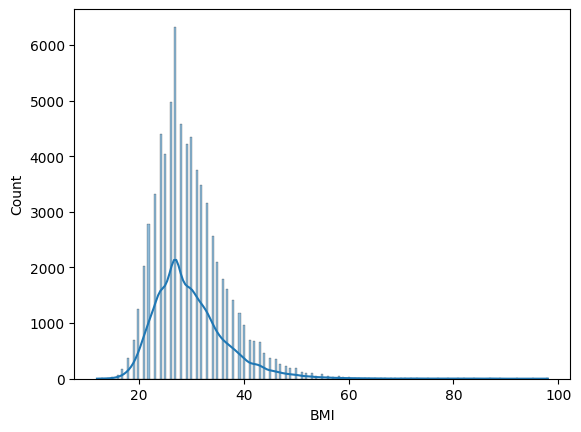

In [ ]:
sns.histplot(diabetes_data_balanced['BMI'], kde=True)

In [ ]:
diabetes_data_balanced['BMI']= MinMaxScaler().fit_transform(diabetes_data_balanced[['BMI']])

<Axes: >

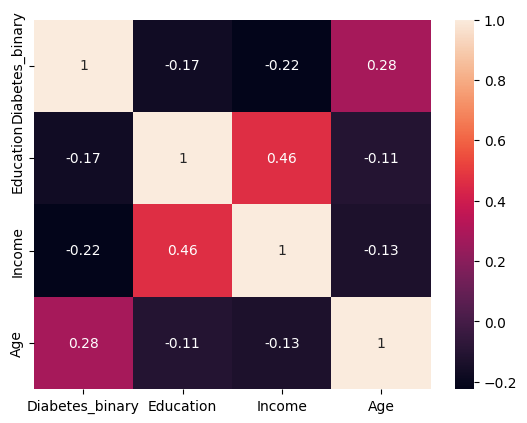

In [ ]:
sns.heatmap(diabetes_data_balanced[['Diabetes_binary', 'Education', 'Income', 'Age']].corr(), annot=True)

<Axes: >

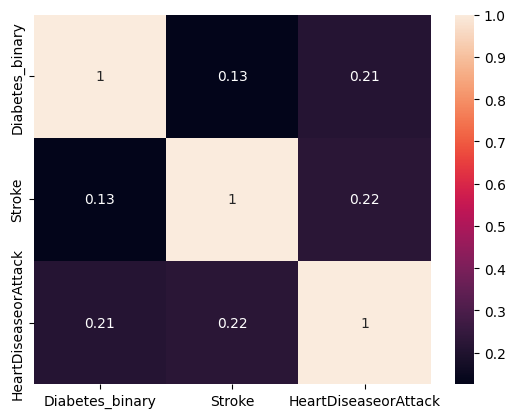

In [ ]:
sns.heatmap(diabetes_data_balanced[['Diabetes_binary', 'Stroke', 'HeartDiseaseorAttack']].corr(), annot=True)

In [ ]:
columns_to_drop = [
    'CholCheck',
    'Stroke',
    'HvyAlcoholConsump',
    'AnyHealthcare',
    'NoDocbcCost',
    'Education',
]

diabetes_data_processed = diabetes_data_balanced.drop(columns = columns_to_drop)

In [ ]:
diabetes_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   HeartDiseaseorAttack  70692 non-null  float64
 6   PhysActivity          70692 non-null  float64
 7   Fruits                70692 non-null  float64
 8   Veggies               70692 non-null  float64
 9   GenHlth               70692 non-null  float64
 10  MentHlth              70692 non-null  float64
 11  PhysHlth              70692 non-null  float64
 12  DiffWalk              70692 non-null  float64
 13  Sex                   70692 non-null  float64
 14  Age                   70692 non-null  float64
 15  Income             

In [ ]:
diabetes_data_processed['GenHlth'] = diabetes_data_processed['GenHlth'].apply(lambda x: 6 - x)

In [ ]:
diabetes_data_processed.describe()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Income,log_BMI
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.207639,0.475273,0.147810,0.703036,0.611795,0.788774,3.162918,3.752037,5.810417,0.252730,0.456997,8.584055,5.698311,3.371445
std,0.500004,0.495960,0.499342,0.082720,0.499392,0.354914,0.456924,0.487345,0.408181,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,2.175196,0.218763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.484907
25%,0.000000,0.000000,0.000000,0.151163,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,3.218876
50%,0.500000,1.000000,1.000000,0.197674,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,6.000000,3.367296
75%,1.000000,1.000000,1.000000,0.244186,1.000000,0.000000,1.000000,1.000000,1.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,8.000000,3.496508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,8.000000,4.584967
